> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#data=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
# Information of the input data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

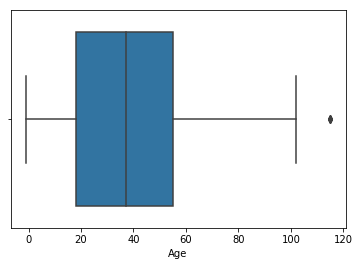

In [5]:
#Convert the data type of 'ScheduledDay', 'AppointmentDay'
data['ScheduledDay'] =  pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] =  pd.to_datetime(data['AppointmentDay'])

#No Null values

# See the Age group is valid
sns.boxplot(data['Age']);


In [ ]:
#Remove invalid age group values and age >=100 from the data set
data = data[ (data['Age'] <=100) & (data['Age']>0)]

In [6]:
#Calculate the value count of Yes and No in 'No-show'
df_count = data['No-show'].value_counts()
df_count

No     85303
Yes    21677
Name: No-show, dtype: int64

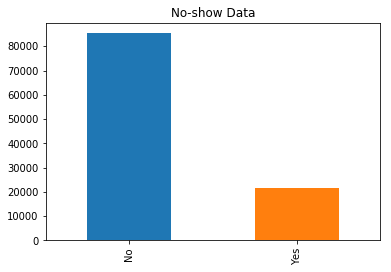

In [7]:
#Plot the 
df_count.plot(kind='bar',title="No-show Data");

In [8]:
#Define a function to take the key from user, group by this key &'No-Show' and return the propability for No-Show's
def calculateProbability(df,keys,return_result=False):
    #Add 'No-Show' as paremeter other than the key to group the input data frame
    keys.append('No-show')
    lst = [] #Delcare list variable 
    lst_key= {} #Declare key variable
    df_temp = df.groupby(keys).count() 
    #display(df_temp)
    
    for i in range(0,len(df_temp),2):
        # print(len(df_temp)) # Count of combinations
        # print("Value of i is",i) # loop value
        # print(df_temp['PatientId'][i+1] , df_temp['PatientId'][i]) #value of each row
        # print(df_temp.index[i][0])
        lst.append(df_temp['PatientId'].iloc[i+1] / (df_temp['PatientId'].iloc[i]+df_temp['PatientId'].iloc[i+1]))
        #logic is - value of "No-Show" as Yes / (Total value for YES+No)
        lst_key[df_temp.index[i][0]] = df_temp['PatientId'].iloc[i+1] / (df_temp['PatientId'].iloc[i]+df_temp['PatientId'].iloc[i+1])    
    if(return_result):
        return lst_key
    return lst

<a id='eda'></a>
## Exploratory Data Analysis


<a id='eda'></a>
# Question : Gender distribution for appointment drops

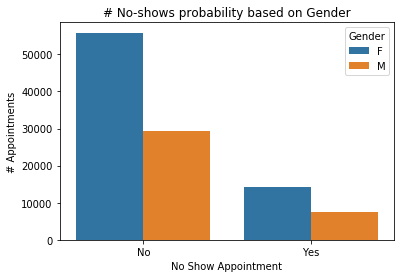

In [9]:
#Get the propability based on the Gender
count_gender = calculateProbability(data,['Gender'])
# count_gender #display vlaues
#Plot the graph
sns.countplot(data['No-show'], hue=data['Gender'])
plt.title('# No-shows probability based on Gender');
plt.xlabel('No Show Appointment')
plt.ylabel('# Appointments');

In [10]:
data.groupby(['Gender','No-show']).count()

PatientId  AppointmentID  ScheduledDay  AppointmentDay    Age  \
Gender No-show                                                                  
F      No           55839          55839         55839           55839  55839   
       Yes          14272          14272         14272           14272  14272   
M      No           29464          29464         29464           29464  29464   
       Yes           7405           7405          7405            7405   7405   

                Neighbourhood  Scholarship  Hipertension  Diabetes  \
Gender No-show                                                       
F      No               55839        55839         55839     55839   
       Yes              14272        14272         14272     14272   
M      No               29464        29464         29464     29464   
       Yes               7405         7405          7405      7405   

                Alcoholism  Handcap  SMS_received  
Gender No-show                                     
F      No            55839    55839         55839  
       Yes           14272    14272         14272  
M      No            29464    29464         29464  
       Yes            7405     7405          7405

### Inferences for Gender Analysis
Nearly 20% of the people do not show up irrespective of gender
Women tend to have less No-shows than men in the given data set

<a id='eda'></a>
## Question : How Scholarship impact the appointments

Probability Values are {0: 0.19866695781472585, 1: 0.23785734110463502}


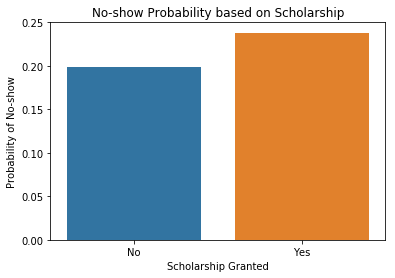

In [11]:
#Get the propability based on the scholarship
count_Scholarship = calculateProbability(data,['Scholarship'], True)
print("Probability Values are", count_Scholarship) #display vlaues
#Plot the graph
sns.barplot(x = ['No','Yes'] , y=np.array(list(count_Scholarship.values())))
plt.title('No-show Probability based on Scholarship');
plt.xlabel('Scholarship Granted')
plt.ylabel('Probability of No-show');

In [12]:
data.groupby(['Scholarship','No-show']).count()

PatientId  AppointmentID  Gender  ScheduledDay  \
Scholarship No-show                                                   
0           No           77065          77065   77065         77065   
            Yes          19106          19106   19106         19106   
1           No            8238           8238    8238          8238   
            Yes           2571           2571    2571          2571   

                     AppointmentDay    Age  Neighbourhood  Hipertension  \
Scholarship No-show                                                       
0           No                77065  77065          77065         77065   
            Yes               19106  19106          19106         19106   
1           No                 8238   8238           8238          8238   
            Yes                2571   2571           2571          2571   

                     Diabetes  Alcoholism  Handcap  SMS_received  
Scholarship No-show                                               
0           No          77065       77065    77065         77065  
            Yes         19106       19106    19106         19106  
1           No           8238        8238     8238          8238  
            Yes          2571        2571     2571          2571

### Inferences for Scholarship Analysis
People without scholarship are more likely to make it to the appointment

<a id='eda'></a>

## Question : Do seniding SMS improve the appointment drops

Probability valuse are {0: 0.16726062213381954, 1: 0.27665972704140646}


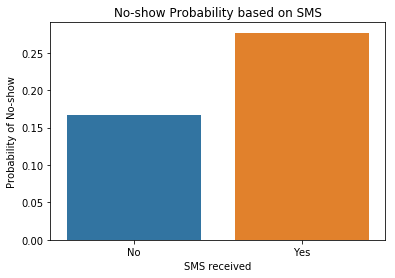

In [13]:
count_sms = calculateProbability(data,['SMS_received'],True)
print("Probability valuse are",count_sms) #display vlaues
#Plot the graph
sns.barplot(x = ['No', 'Yes'] , y=np.array(list(count_sms.values())))
plt.title('No-show Probability based on SMS');
plt.xlabel('SMS received')
plt.ylabel('Probability of No-show');

In [14]:
data.groupby('SMS_received').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
SMS_received,,,,,,,,,,,,,
0,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396
1,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584


### Inferences for SMS Analysis
People who have not recevied SMS tend to miss the appointment

<a id='eda'></a>

# Step 4: Conclusions

1. Nearly 20% of the people do not show up irrespective of gender
2. Women tend to have less No-shows than men in the provided data set
3. People without scholarship are more likely to make it to the appointment
4. People who have not recevied SMS tend to miss the appointment

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [15]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0